### Stock price = 240pt, Exercise = 250pt, Maturity = 2 Months, Vol=38%, R_f = 6%
### Compute Call price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from numpy import random
from scipy.stats import norm
import time

In [2]:
S = 240; E = 250; T = 2/12; vol = 0.38; r = 0.06

In [3]:
d1 = (np.log(S/E) + (r + 0.5 * vol**2 )* T)/(vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)
Call_Price = round(S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2),4)
Call_Price

11.6105

### Suppose there are 51 stock prices.

In [4]:
S = np.linspace(0,400,51); E = 250; T = 2/12; vol = 0.38; r = 0.06

In [5]:
d1 = (np.log(S/E) + (r + 0.5 * vol**2 )* T)/(vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)
Call_Price = S * norm.cdf(d1) - E * np.exp(-r * T) * norm.cdf(d2)
Call_Price

c:\users\jaehwan m\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([0.00000000e+000, 2.94909483e-109, 2.55833318e-070, 1.54912055e-051,
       5.39505272e-040, 4.64758823e-032, 3.11016727e-026, 9.07714398e-022,
       3.06274664e-018, 2.17457281e-015, 4.80463667e-013, 4.31862879e-011,
       1.91062799e-009, 4.78421703e-008, 7.53117002e-007, 8.07930878e-006,
       6.29175157e-005, 3.73995360e-004, 1.76706610e-003, 6.85968873e-003,
       2.24851745e-002, 6.36708800e-002, 1.58777822e-001, 3.54437672e-001,
       7.18237351e-001, 1.33725618e+000, 2.31167660e+000, 3.74431879e+000,
       5.72834695e+000, 8.33596347e+000, 1.16104966e+001, 1.55631851e+001,
       2.01746714e+001, 2.54001857e+001, 3.11768645e+001, 3.74316234e+001,
       4.40883215e+001, 5.10734486e+001, 5.83200360e+001, 6.57698644e+001,
       7.33742627e+001, 8.10938818e+001, 8.88978230e+001, 9.67624385e+001,
       1.04670038e+002, 1.12607658e+002, 1.20565967e+002, 1.28538365e+002,
       1.36520249e+002, 1.44508454e+002, 1.52500833e+002])

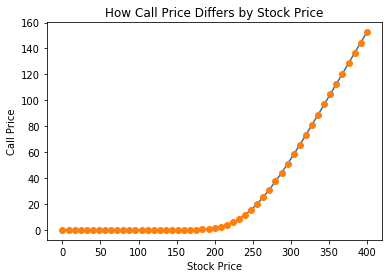

In [6]:
plt.plot(S, Call_Price)
plt.plot(S, Call_Price, 'o')
plt.xlabel("Stock Price")
plt.ylabel("Call Price")
plt.title("How Call Price Differs by Stock Price")
plt.show()

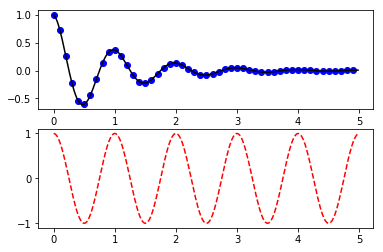

In [7]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

### 3 Exercise prices(200, 250, 300)

In [8]:
S = np.linspace(0,400,51); E = np.array([200,250,300])
T = 2/12; vol = 0.38; r = 0.06

In [9]:
S[:]

array([  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.,
        88.,  96., 104., 112., 120., 128., 136., 144., 152., 160., 168.,
       176., 184., 192., 200., 208., 216., 224., 232., 240., 248., 256.,
       264., 272., 280., 288., 296., 304., 312., 320., 328., 336., 344.,
       352., 360., 368., 376., 384., 392., 400.])

In [10]:
d1 = np.zeros((len(S), len(E)))
d2 = np.zeros((len(S), len(E)))
Call_Price = np.zeros((len(S), len(E)))

t1 = time.time()
for i in range(3):
    d1[:,i] = (np.log(S/E[i]) + (r + 0.5 * vol**2 )* T)/(vol * np.sqrt(T))
    d2[:,i] = d1[:,i] - vol * np.sqrt(T)
    Call_Price[:, i] = S[:] * norm.cdf(d1[:,i]) - E[i] * np.exp(-r * T) * norm.cdf(d2[:,i])  
t2 = time.time()
print(t2-t1)
Call_Price[:5,:]

0.007999658584594727


c:\users\jaehwan m\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [7.07624462e-096, 2.94909483e-109, 7.46510067e-121],
       [1.02801095e-059, 2.55833318e-070, 1.20512278e-079],
       [1.49429042e-042, 1.54912055e-051, 1.54201642e-059],
       [3.71807058e-032, 5.39505272e-040, 4.65629606e-047]])

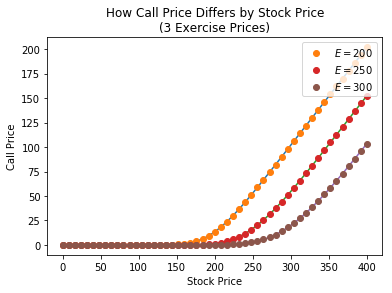

In [11]:
fig = plt.figure()
ax = plt.subplot(111)
for i in range(3):
    ax.plot(S, Call_Price[:,i])
    ax.plot(S, Call_Price[:,i], 'o', label = '$E = %d$' % E[i])
plt.xlabel("Stock Price")
plt.ylabel("Call Price")
plt.title("How Call Price Differs by Stock Price\n(3 Exercise Prices)")
ax.legend(loc = 'upper right')
plt.show()

In [13]:
norm.cdf(np.zeros((5,3)))

array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5]])

### 3 Risk-free Rates(0%, 20%, 40%)

In [14]:
S = np.linspace(0,400,51); E = 250
T = 2/12; vol = 0.38; r = np.array([0,0.2,0.4])

In [15]:
d1 = np.zeros((len(S), len(r)))
d2 = np.zeros((len(S), len(r)))
Call_Price = np.zeros((len(S), len(r)))

t1 = time.time()
for i in range(3):
    d1[:,i] = (np.log(S/E) + (r[i] + 0.5 * vol**2 )* T)/(vol * np.sqrt(T))
    d2[:,i] = d1[:,i] - vol * np.sqrt(T)
    Call_Price[:, i] = S[:] * norm.cdf(d1[:,i]) - E * np.exp(-r[i] * T) * norm.cdf(d2[:,i])  
t2 = time.time()
print(t2-t1)
Call_Price[:5,:]

0.003995180130004883


c:\users\jaehwan m\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [7.06515521e-110, 8.14121133e-108, 8.95957429e-106],
       [8.16296296e-071, 3.61885892e-069, 1.53239997e-067],
       [5.84269242e-052, 1.48330079e-050, 3.59723495e-049],
       [2.29054245e-040, 3.91912344e-039, 6.40638920e-038]])

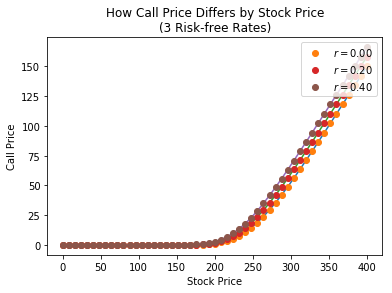

In [16]:
fig = plt.figure()
ax = plt.subplot(111)
for i in range(3):
    ax.plot(S, Call_Price[:,i])
    ax.plot(S, Call_Price[:,i], 'o', label = '$r = %.2f$' %r[i]) ## 이건 나중에
plt.xlabel("Stock Price")
plt.ylabel("Call Price")
plt.title("How Call Price Differs by Stock Price\n(3 Risk-free Rates)")
ax.legend(loc = 'upper right')
plt.show()

### 3 Maturitries(1 month, 5 months, 10 months)

In [17]:
S = np.linspace(0,400,51); E = 250
T = np.array([1/12, 5/12, 10/12]); vol = 0.38; r = 0.06

In [18]:
d1 = np.zeros((len(S), len(T)))
d2 = np.zeros((len(S), len(T)))
Call_Price = np.zeros((len(S), len(T)))

t1 = time.time()
for i in range(3):
    d1[:,i] = (np.log(S/E) + (r + 0.5 * vol**2 )* T[i])/(vol * np.sqrt(T[i]))
    d2[:,i] = d1[:,i] - vol * np.sqrt(T[i])
    Call_Price[:, i] = S[:] * norm.cdf(d1[:,i]) - E * np.exp(-r * T[i]) * norm.cdf(d2[:,i])  
t2 = time.time()
print(t2-t1)
Call_Price[:5,:]

0.003999233245849609


c:\users\jaehwan m\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.32896928e-216, 1.57771910e-044, 1.04210015e-022],
       [6.03351916e-139, 8.01798047e-029, 9.51472362e-015],
       [1.55886561e-101, 3.21390582e-021, 7.13417486e-011],
       [1.42568705e-078, 1.57076463e-016, 1.80437168e-008]])

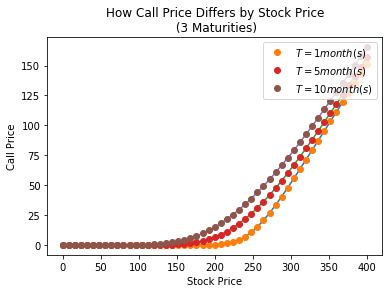

In [19]:
fig = plt.figure()
ax = plt.subplot(111)
for i in range(3):
    t = int(T[i]*12)
    ax.plot(S, Call_Price[:,i])
    ax.plot(S, Call_Price[:,i], 'o', label = '$T = %s month(s)$' %t) ## 이건 나중에
plt.xlabel("Stock Price")
plt.ylabel("Call Price")
plt.title("How Call Price Differs by Stock Price\n (3 Maturities)")
ax.legend(loc = 'upper right')
plt.show()

### 3 volatilities(0.1, 0.38, 0.70)

In [20]:
S = np.linspace(0,400,51); E = 250
T = 2/12; vol = np.array([0.1,0.38,0.70]); r = 0.06

In [21]:
d1 = np.zeros((len(S), len(vol)))
d2 = np.zeros((len(S), len(vol)))
Call_Price = np.zeros((len(S), len(vol)))

t1 = time.time()
for i in range(3):
    d1[:,i] = (np.log(S/E) + (r + 0.5 * vol[i]**2 )* T)/(vol[i] * np.sqrt(T))
    d2[:,i] = d1[:,i] - vol[i] * np.sqrt(T)
    Call_Price[:, i] = S[:] * norm.cdf(d1[:,i]) - E * np.exp(-r * T) * norm.cdf(d2[:,i])  
t2 = time.time()
print(t2-t1)
Call_Price[:5,:]

0.0039997100830078125


c:\users\jaehwan m\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 2.94909483e-109, 1.63661496e-033],
       [0.00000000e+000, 2.55833318e-070, 8.48785741e-022],
       [0.00000000e+000, 1.54912055e-051, 4.16470800e-016],
       [0.00000000e+000, 5.39505272e-040, 1.38303768e-012]])

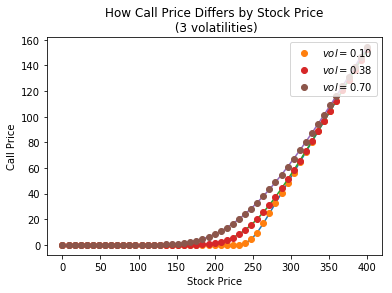

In [22]:
fig = plt.figure()
ax = plt.subplot(111)
for i in range(3):
    vol_i = vol[i]
    ax.plot(S, Call_Price[:,i])
    ax.plot(S, Call_Price[:,i], 'o', label = '$ vol = %.2f $' % vol[i]) 
plt.xlabel("Stock Price")
plt.ylabel("Call Price")
plt.title("How Call Price Differs by Stock Price\n (3 volatilities)")
ax.legend(loc = 'upper right')
plt.show()